In [83]:
%pip install tensorflow
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [54]:
import tensorflow
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train/255
X_test = X_test/255

In [66]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

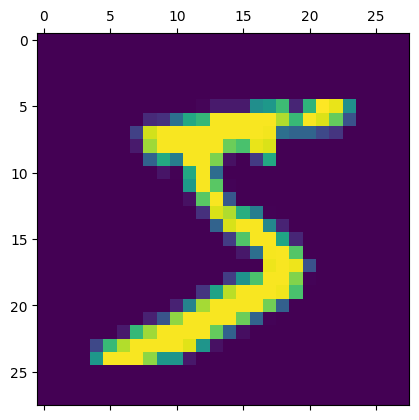

In [57]:
plt.matshow(X_train[0])

In [58]:
X_train.shape

(60000, 28, 28)

In [59]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

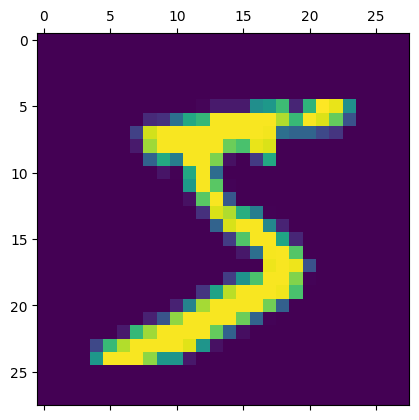

In [60]:
plt.matshow(X_train[0])

In [65]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics = [
    keras.metrics.CategoricalAccuracy()
])
model.fit(X_train_flattened, y_train, epochs=10)

/home/vscode/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - categorical_accuracy: 0.0641 - loss: 0.7331
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.0678 - loss: 0.3121
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.0664 - loss: 0.2815
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.0648 - loss: 0.2688
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.0677 - loss: 0.2709
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.0663 - loss: 0.2593
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.0668 - loss: 0.2593
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.0667 - loss: 0.2580
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.0685 - loss: 0.2505
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.0692 - loss: 0.2489

In [67]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.0700 - loss: 0.2984


[0.26308050751686096, 0.07199999690055847]

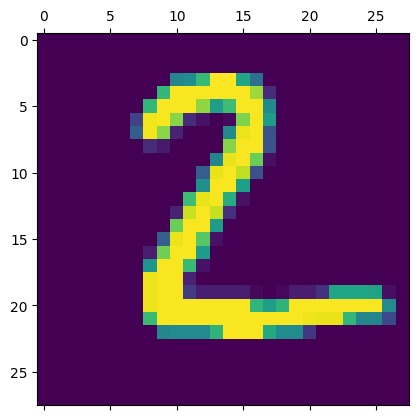

In [77]:
plt.matshow(X_test[1])

In [76]:
y_prdicted = model.predict(X_test_flattened)
y_prdicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([3.1679037e-01, 4.1959053e-03, 9.9976754e-01, 2.4210975e-01,
       1.0685327e-11, 8.5539353e-01, 8.9618772e-01, 1.7001039e-15,
       1.5270486e-01, 6.1775541e-12], dtype=float32)

In [75]:
np.argmax(y_prdicted[1])

2

In [80]:
y_prdicted_labels = [np.argmax(i) for i in y_prdicted ]
y_prdicted_labels[:5]

[7, 2, 1, 0, 4]

In [81]:
import tensorflow as tf
cm  = tf.math.confusion_matrix(labels=y_test, predictions=y_prdicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   4,    7,  931,   19,    7,    3,   11,   10,   37,    3],
       [   2,    0,   16,  933,    0,   15,    2,    9,   25,    8],
       [   1,    1,    6,    2,  909,    0,    8,    4,   10,   41],
       [   8,    2,    3,   45,    9,  759,   13,    9,   37,    7],
       [   8,    3,    8,    2,    7,   14,  911,    2,    3,    0],
       [   1,    6,   21,   11,    7,    1,    0,  938,    3,   40],
       [   6,    7,    6,   21,    9,   17,    6,    7,  885,   10],
       [   9,    8,    1,    9,   19,    4,    0,   12,   10,  937]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

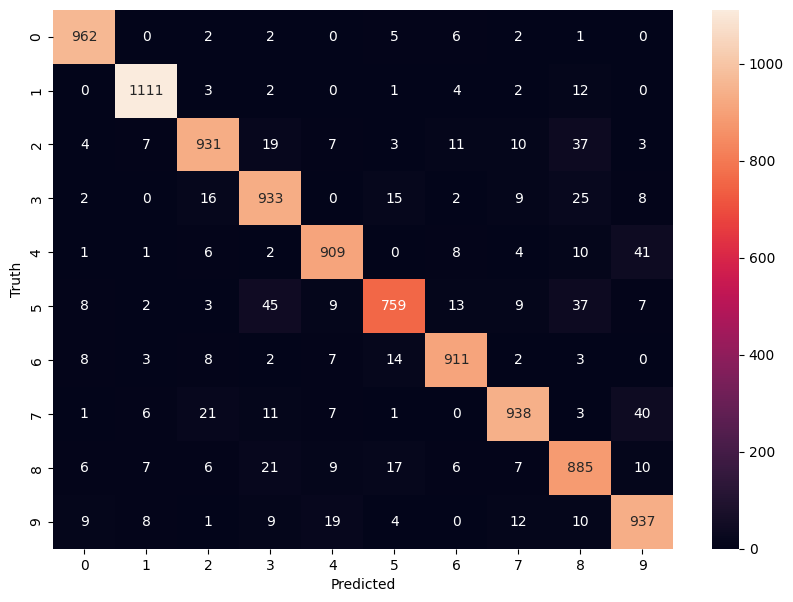

In [84]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [85]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics = [
    keras.metrics.CategoricalAccuracy()
])
model.fit(X_train_flattened, y_train, epochs=10)

/home/vscode/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - categorical_accuracy: 0.0680 - loss: 0.4550
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.0658 - loss: 0.1323
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.0671 - loss: 0.0896
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - categorical_accuracy: 0.0655 - loss: 0.0679
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - categorical_accuracy: 0.0651 - loss: 0.0532
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.0668 - loss: 0.0412
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.0644 - loss: 0.0338
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.0645 - loss: 0.0272
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.0661 - loss: 0.0219
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - categorical_accuracy: 0.0671 - loss: 0.018

In [86]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.0695 - loss: 0.0975


[0.08787531405687332, 0.07190000265836716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(50.722222222222214, 0.5, 'Actual')

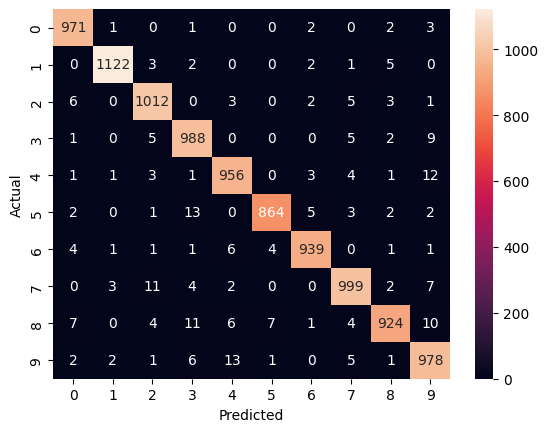

In [92]:
import tensorflow as tf
y_prdicted = model.predict(X_test_flattened)
y_prdicted_labels = [np.argmax(i) for i in y_prdicted ]
cm  = tf.math.confusion_matrix(labels=y_test, predictions=y_prdicted_labels)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [113]:
X_train.shape

(60000, 28, 28)

In [117]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [122]:
keras.utils.to_categorical(y_train, num_classes=np.max(y_train)+1)[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [116]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.fit(X_train, keras.utils.to_categorical(y_train, num_classes=np.max(y_train)+1), epochs=10)

/home/vscode/.local/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8682 - loss: 0.4681
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9595 - loss: 0.1388
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9735 - loss: 0.0902
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9802 - loss: 0.0660
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9840 - loss: 0.0509
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9892 - loss: 0.0366
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9903 - loss: 0.0315
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9919 - loss: 0.0243
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9936 - loss: 0.0203
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9946 - loss: 0.0181


In [119]:
model.evaluate(X_test, keras.utils.to_categorical(y_test, num_classes=np.max(y_test)+1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9713 - loss: 0.1008


[0.08333862572908401, 0.9769999980926514]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

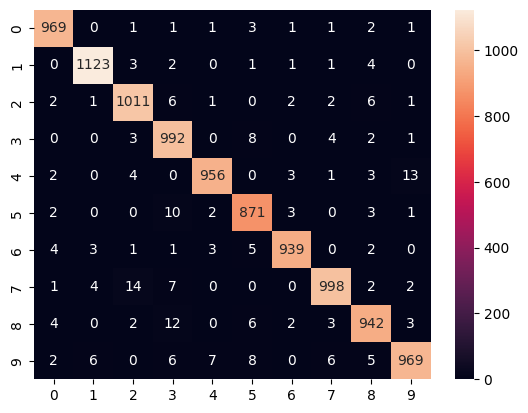

In [120]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels )
sn.heatmap(cm, annot=True, fmt='d')